# **LAB 4 - Một số thuật toán cơ bản của MachineLearning**

1. Linear regersstion
- Biết: Hồi quy tuyến tính là dự đoán giá trị liên tục dựa trên một hoặc nhiều biến đọc lập.

In [1]:
!pip install scikit-learn


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# sử dụng hồi quy tuyến tính để dự đoán giá nhà thông qua bộ dữ liệu fetch califonia
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

cali = fetch_california_housing()
X = pd.DataFrame(cali.data, columns=cali.feature_names)
y = pd.Series(cali.target)

In [ ]:
# Chia tập dữ liệu có 80% huấn luyện và 20% kiểm tra.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Xây dựng và huấn luyện mô hình
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Dự đoán và đánh giá
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.5558915986952444
R-squared: 0.5757877060324508


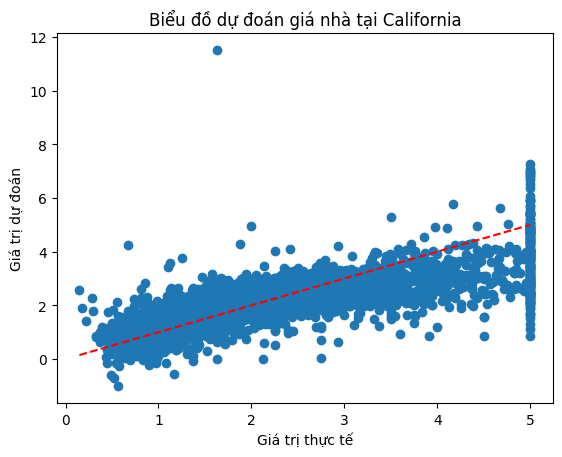

In [ ]:
# trực quan hóa dữ liệu (vẽ biểu đồ)
plt.scatter(y_test, y_pred)
plt.xlabel("Giá trị thực tế")
plt.ylabel("Giá trị dự đoán")
plt.title("Biểu đồ dự đoán giá nhà tại California")

# đường hồi quy
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

Bài tập ứng dụng:

0.5747759809992782


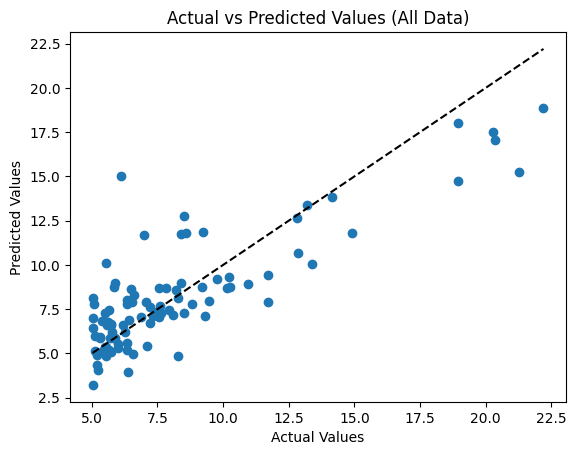

8.56501091009175


In [ ]:
df = pd.read_csv('/content/lab1data1.csv')

X = pd.DataFrame(df['x'])
y = pd.DataFrame(df['y'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict the values
y_pred = model.predict(X_test)

# Calculate the R^2 score
r2_score = model.score(X_test, y_test)
print(r2_score)


# Plot the results for all data
y_all_pred = model.predict(X)
plt.scatter(y, y_all_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values (All Data)")
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--k')
plt.axis('tight')
plt.show()

# Calculate and print the mean squared error
print(mean_squared_error(y_test, y_pred))


2. Hồi Quy logistic
- Phân loại nhị phân hoặc đa lớp dựa qua các đặc trưng

In [ ]:
# Xây dựng mô hình LG để phân loại nhị phân trong dữ liệu breast Canner

from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
# Load data
cancer = load_breast_cancer()
X = pd.DataFrame(cancer.data, columns=cancer.feature_names)
y = pd.DataFrame(cancer.target, columns=['target'])

In [ ]:
# Chia tập dữ liệu thành tập huấn luyện 75% và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
# Xây dựng và huấn luyện mô hình
model = LogisticRegression()
model.fit(X_train, y_train.values.ravel())

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
# Dự đoán và đánh giá mô hình
y_pred = model.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))

# Print the confusion matrix
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95        54
           1       0.97      0.98      0.97        89

    accuracy                           0.97       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.97      0.97      0.96       143

[[51  3]
 [ 2 87]]


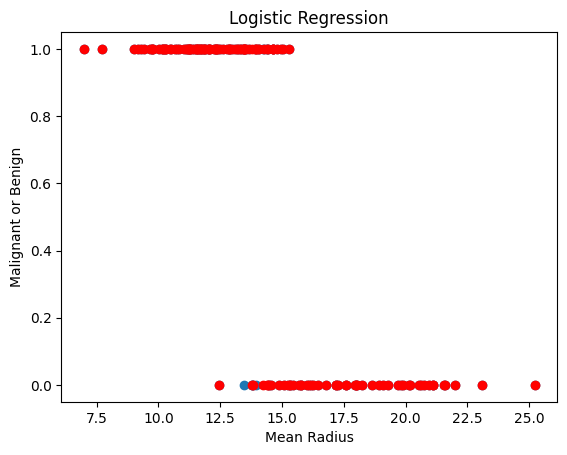

In [ ]:
plt.scatter(X_test['mean radius'], y_test)
plt.scatter(X_test['mean radius'], y_pred, color='red')
plt.xlabel('Mean Radius')
plt.ylabel('Malignant or Benign')
plt.title('Logistic Regression')

plt.show()

3. Phân cụm
- Nhóm các đối tượng có đặc điểm tương đồng mà không cần gán nhãn.

In [ ]:
#  Sử dụng data Iris để phân cụm
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [ ]:
iris = datasets.load_iris()
x = pd.DataFrame(iris.data, columns=iris.feature_names) # có 4 đặc trưng
y = pd.DataFrame(iris.target, columns=['target']) # nhãn để so sánh

In [ ]:
# Aps dụng KMean với số cụm là 3
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(x)
y_Kmeans = kmeans.predict(x)

In [ ]:
# sử dụng PCA để giảm chiều (về nhà giải thích ở bài tập về nhà)
PCA = PCA(n_components=2) # giảm xuống thành 2 chiều
x_PCA = PCA.fit_transform(x)

In [ ]:
# trực quan hóa kết quả


4. Bài tập về nhà
- Cho tập dữ liệu

In [ ]:
# Cho dữ liệu dự đoán bệnh tim bằng hồi quy logictis

In [ ]:
# ứng dụng thuật toán phân cụm kmeans cho tập dữ liệu customer data (kaggle)

In [ ]:
# Tìm hiểu về ma trận nhầm lẫn và đánh giá độ chính xác trên các bài tập lớn, khuyến nghị precision, recall, curence.

nộp bài ngày: thứ 6 tuần sau